In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.spatial.distance import euclidean
import cv2
from google.colab.patches import cv2_imshow
from scipy.spatial import ConvexHull
from scipy.stats import pearsonr

In [ ]:
!pip install face-alignment

In [ ]:
!pip install imageio

In [ ]:
import torch
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
print(device)

cuda


In [ ]:
import face_alignment
from skimage import io

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device=device)



Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:06<00:00, 14.5MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:06<00:00, 15.4MB/s]


In [ ]:
input = io.imread('/content/A010_02_NSM_BLOW_color.avi_273.jpg')
preds = fa.get_landmarks(input)
if preds is not None:
  print('yes')
  print(preds)
else:
  print('no')

yes
[array([[233., 251.],
       [236., 281.],
       [240., 303.],
       [247., 329.],
       [255., 355.],
       [269., 373.],
       [288., 388.],
       [306., 403.],
       [336., 414.],
       [365., 403.],
       [380., 384.],
       [395., 373.],
       [406., 347.],
       [413., 321.],
       [417., 299.],
       [421., 270.],
       [421., 244.],
       [258., 222.],
       [273., 214.],
       [288., 207.],
       [299., 207.],
       [314., 211.],
       [362., 211.],
       [373., 207.],
       [388., 207.],
       [399., 211.],
       [410., 214.],
       [336., 240.],
       [340., 262.],
       [340., 281.],
       [343., 296.],
       [321., 307.],
       [329., 307.],
       [340., 310.],
       [351., 307.],
       [354., 307.],
       [281., 240.],
       [292., 236.],
       [303., 236.],
       [310., 244.],
       [303., 248.],
       [292., 244.],
       [358., 240.],
       [373., 233.],
       [384., 233.],
       [391., 236.],
       [384., 244.],
       [

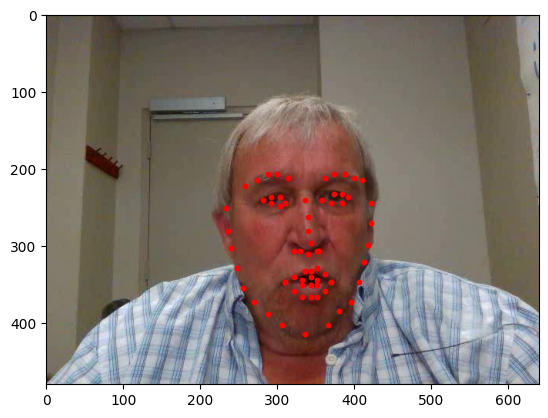

In [ ]:
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(input)

# Plot the landmarks
for landmark in preds:
    plt.scatter(landmark[:, 0], landmark[:, 1], s=10, c='red')

plt.show()

In [ ]:
df_lg=pd.read_csv("/content/drive/MyDrive/neuro_data/Neuroface/ALS/Bbox_gt/A002_02_BBP_NORMAL_color_gt.txt")
df_lg

,Frame,x1,y1,x2,y2
0,159,178.52026,161.49550,354.18243,333.27927
1,446,180.88095,160.84380,353.88095,337.29650
2,455,180.37500,162.92294,354.62500,335.29460
3,476,180.13692,165.72910,354.38690,341.32367
4,184,180.86905,157.29167,354.36905,331.04166
5,204,181.05952,162.10120,356.55950,333.85120
6,209,180.09525,161.91070,356.09525,331.66070
7,232,180.41070,164.10713,353.16070,341.60715
8,280,180.88095,161.97023,353.88095,329.22025
9,305,180.87500,158.94049,354.12500,333.44046


In [ ]:
import os
import re

# Path to the folder containing your images
image_folder = "/content/drive/MyDrive/neuro_data/Neuroface/ALS/Frames"

# List to hold the frame data
frame_data = []

# Loop through all the files in the image folder
for filename in os.listdir(image_folder):
    # Check if the file is an image (you can adjust the condition based on your file type)
    if filename.endswith(".jpg"):
        # Updated regex pattern
        match = re.match(r"([A-Za-z0-9_]+)\.avi_([0-9]+)\.jpg", filename)

        if match:
            subject = match.group(1)   # Extract the subject and descriptive text (e.g., A002_02_BBP_NORMAL_color)
            frame_number = int(match.group(2))  # Extract the frame number (e.g., 209)
            frame_data.append({"subject": subject, "frame": frame_number, "filename": filename})
        else:
            print(f"Filename does not match regex: {filename}")

# Print the automatically generated frame_data
if frame_data:
    for frame in frame_data:
        print(frame)
else:
    print("No matching files found!")


{'subject': 'A002_02_BBP_NORMAL_color', 'frame': 209, 'filename': 'A002_02_BBP_NORMAL_color.avi_209.jpg'}
{'subject': 'A002_02_BBP_NORMAL_color', 'frame': 280, 'filename': 'A002_02_BBP_NORMAL_color.avi_280.jpg'}
{'subject': 'A002_02_DDK_PA_color', 'frame': 129, 'filename': 'A002_02_DDK_PA_color.avi_129.jpg'}
{'subject': 'A002_02_DDK_PA_color', 'frame': 116, 'filename': 'A002_02_DDK_PA_color.avi_116.jpg'}
{'subject': 'A002_02_DDK_PATAKA_color', 'frame': 194, 'filename': 'A002_02_DDK_PATAKA_color.avi_194.jpg'}
{'subject': 'A002_02_BBP_NORMAL_color', 'frame': 325, 'filename': 'A002_02_BBP_NORMAL_color.avi_325.jpg'}
{'subject': 'A002_02_BBP_NORMAL_color', 'frame': 204, 'filename': 'A002_02_BBP_NORMAL_color.avi_204.jpg'}
{'subject': 'A002_02_BBP_NORMAL_color', 'frame': 159, 'filename': 'A002_02_BBP_NORMAL_color.avi_159.jpg'}
{'subject': 'A002_02_DDK_PA_color', 'frame': 127, 'filename': 'A002_02_DDK_PA_color.avi_127.jpg'}
{'subject': 'A002_02_DDK_PA_color', 'frame': 135, 'filename': 'A002_02

In [ ]:
import os
import cv2
import face_alignment
import torch

# Initialize the Face Alignment model (FAN)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device=device)

# List of categories
categories = ["ALS", "PS", "HC"]

# Base paths for images and bounding boxes
base_image_folder = "/content/drive/MyDrive/neuro_data/Neuroface"
base_bbox_folder = "/content/drive/MyDrive/neuro_data/Neuroface"
base_output_folder = "/content/new_results"  # Parent output folder
base_text_output_folder = "/content/new_text_results"

# Create base output folders if they don't exist
os.makedirs(base_output_folder, exist_ok=True)
os.makedirs(base_text_output_folder, exist_ok=True)

# Process each category
for category in categories:
    print(f"Processing category: {category}")

    # Paths for the current category
    image_folder = os.path.join(base_image_folder, category, "Frames")
    bbox_folder = os.path.join(base_bbox_folder, category, "Bbox_gt")
    output_folder = os.path.join(base_output_folder, category)
    text_output_folder = os.path.join(base_text_output_folder, category)

    # Create category-specific output folders if they don't exist
    os.makedirs(output_folder, exist_ok=True)
    os.makedirs(text_output_folder, exist_ok=True)

    # Loop through all the bounding box files in the bbox folder
    for bbox_filename in os.listdir(bbox_folder):
        if bbox_filename.endswith("_color_gt.txt"):
            # Extract the subject from the bbox filename
            subject = bbox_filename.replace("_color_gt.txt", "")
            bbox_filepath = os.path.join(bbox_folder, bbox_filename)

            # Create a text file to save the landmarks for each subject
            text_file_path = os.path.join(text_output_folder, f"{subject}_color.txt")

            # Open the text file to write
            with open(text_file_path, "w") as text_file:
                text_file.write("Frame, " + ", ".join([f"x{i}, y{i}" for i in range(1, 69)]) + "\n")

                # Load the bounding boxes from the file
                with open(bbox_filepath, "r") as f:
                    header = f.readline()  # Skip header line

                    # Process each line in the bounding box file
                    for line in f:
                        parts = line.strip().split(',')

                        if len(parts) == 5:
                            try:
                                bbox_frame = int(parts[0].strip())  # Frame number
                                x1, y1, x2, y2 = map(float, parts[1:])  # Bounding box coordinates
                            except ValueError:
                                print(f"Skipping invalid line: {line}")
                                continue

                            # Correct the filename format
                            frame_filename = f"{subject}_color.avi_{bbox_frame}.jpg"
                            image_filepath = os.path.join(image_folder, frame_filename)

                            # Load the image corresponding to the frame
                            img = cv2.imread(image_filepath)

                            if img is None:
                                print(f"Image {frame_filename} not found. Skipping...")
                                continue

                            # Convert bounding box coordinates to integers
                            x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))

                            # Crop the image to the bounding box region
                            cropped_img = img[y1:y2, x1:x2]

                            # Use FAN model to detect landmarks
                            preds = fa.get_landmarks(cropped_img)

                            if preds is not None:
                                # Prepare a list to store landmarks
                                landmarks_str = [str(bbox_frame)]

                                # Adjust landmarks for the original image
                                for landmark in preds[0]:
                                    original_x = int(landmark[0] + x1)
                                    original_y = int(landmark[1] + y1)
                                    landmarks_str.append(f"{original_x}, {original_y}")

                                    # Draw landmarks on the original image
                                    cv2.circle(img, (original_x, original_y), 2, (0, 255, 0), -1)  # Green circles on landmarks

                                # Save the image with landmarks drawn on it
                                output_image_path = os.path.join(output_folder, f"{subject}_color.avi_{bbox_frame}.jpg")
                                cv2.imwrite(output_image_path, img)
                                print(f"Saved image with landmarks for {frame_filename} to {output_image_path}")

                                # Write the landmarks to the text file
                                text_file.write(", ".join(landmarks_str) + "\n")
                            else:
                                print(f"No landmarks detected for {frame_filename}")


Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:04<00:00, 18.1MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:05<00:00, 18.9MB/s]


Processing category: ALS
Saved image with landmarks for A017_02_DDK_PA_color.avi_280.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_280.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_286.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_286.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_289.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_289.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_309.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_309.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_316.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_316.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_318.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_318.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_326.jpg to /content/new_results/ALS/A017_02_DDK_PA_color.avi_326.jpg
Saved image with landmarks for A017_02_DDK_PA_color.avi_330.jpg to /content/new_results/ALS/A017_02_

In [ ]:
import shutil
from google.colab import files

# Paths to the folders
folders_to_download = ["/content/new_results", "/content/new_text_results"]
zip_filenames = ["new_results.zip", "new_text_results.zip"]

# Loop through the folders, compress each into a ZIP file, and download
for folder, zip_filename in zip(folders_to_download, zip_filenames):
    # Compress the folder into a ZIP file
    shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', folder)

    # Download the ZIP file
    files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
import numpy as np

# Define the directories and categories
base_dir1 = "/content/drive/MyDrive/neuro_data/Neuroface"  # Ground truth landmarks directory
base_dir2 = "/content/drive/MyDrive/neuro_data/Neuroface/landmarks_using_FAN"  # Predicted landmarks directory
categories = ["ALS","HC","PS"]

# Create an empty DataFrame to store the results
# Initialize a list to store results
results_list = []

# Loop through each category
for category in categories:
    # Get the directory containing ground truth landmarks
    landmarks_dir = os.path.join(base_dir1, category, "Landmarks_gt")
    file_paths = []

    # Collect all .txt files in the directory
    for filename in os.listdir(landmarks_dir):
        if filename.endswith(".txt"):
            path = os.path.join(landmarks_dir, filename)
            file_paths.append(path)

    # Loop through each file
    for path in file_paths:
        # Extract the filename for accessing the predicted landmarks file
        filename = os.path.basename(path)

        # Read the ground truth and predicted landmarks
        df_gt = pd.read_csv(os.path.join(base_dir1, category, "Landmarks_gt", filename))
        df_pred = pd.read_csv(os.path.join(base_dir2, category, "Landmarks", filename))

        # Ensure both dataframes are sorted by frame
        df_gt = df_gt.sort_values(by="Frame").reset_index(drop=True)
        df_pred = df_pred.sort_values(by="Frame").reset_index(drop=True)

        # Loop through frames
        for i in range(len(df_gt)):
            if df_gt.loc[i, 'Frame'] == df_pred.loc[i, 'Frame']:
                # Extract 68 landmarks for the current frame
                gt_landmarks = df_gt.iloc[i, 1:].to_numpy().reshape(-1, 2)  # Skip 'Frame' column and reshape to (68, 2)
                pred_landmarks = df_pred.iloc[i, 1:].to_numpy().reshape(-1, 2)

                # Calculate RMSE
                rmse = np.sqrt(np.mean((gt_landmarks - pred_landmarks) ** 2))

                # Normalize RMSE using the bounding box diagonal
                x_min, y_min = np.min(gt_landmarks, axis=0)
                x_max, y_max = np.max(gt_landmarks, axis=0)
                bounding_box_diagonal = np.sqrt((x_max - x_min) ** 2 + (y_max - y_min) ** 2)
                nrmse = rmse / bounding_box_diagonal

                # Append the result to the list
                results_list.append({
                    "File": filename,
                    "Category": category,
                    "Frame": df_gt.loc[i, 'Frame'],
                    "NRMSE": nrmse
                })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Save the results to a CSV file
results_df.to_csv("nrmse_results.csv", index=False)

# Print the DataFrame (optional)
print(results_df)

                            File Category  Frame     NRMSE
0     A006_02_NSM_OPEN_color.txt      ALS      2  0.012699
1     A006_02_NSM_OPEN_color.txt      ALS     13  0.015287
2     A006_02_NSM_OPEN_color.txt      ALS     27  0.016771
3     A006_02_NSM_OPEN_color.txt      ALS    125  0.015305
4     A006_02_NSM_OPEN_color.txt      ALS    145  0.015236
...                          ...      ...    ...       ...
3301  S013_02_NSM_KISS_color.txt       PS    175  0.012909
3302  S013_02_NSM_KISS_color.txt       PS    187  0.012984
3303  S013_02_NSM_KISS_color.txt       PS    225  0.010155
3304  S013_02_NSM_KISS_color.txt       PS    246  0.011983
3305  S013_02_NSM_KISS_color.txt       PS    256  0.011803

[3306 rows x 4 columns]


In [3]:
import os
import cv2
import pandas as pd

# Initialize lists and DataFrame
area = []
frames = []
subject_ids = []
Arest = pd.DataFrame()

base_dir = "/content/drive/MyDrive/neuro_data/Neuroface/landmarks_using_FAN"
base_dir1 = "/content/drive/MyDrive/neuro_data/Neuroface"
categories = ["HC","PS","ALS"]

for category in categories:
    landmark_dir = os.path.join(base_dir, category, "Landmarks")
    video_dir = os.path.join(base_dir1, category, "Videos")  # Directory containing videos/images

    for file_name in os.listdir(landmark_dir):
        if file_name.endswith(".txt"):
            parts = file_name.split('_')
            if len(parts) >= 4:
                task_name = parts[3].upper()
                subject_id = parts[0]

                if task_name == 'KISS':
                    file_path = os.path.join(landmark_dir, file_name)

                    # Read the landmarks
                    df = pd.read_csv(file_path,nrows=1)
                    df.columns = df.columns.str.strip()

                    # Load corresponding video/image file
                    video_file = os.path.join(video_dir, f"{subject_id}_02_NSM_KISS_color.avi")  # Example naming convention
                    print(f"The video is {video_file}")
                    if not os.path.exists(video_file):
                        print(f"Video for {subject_id}_{task_name} not found.")
                        continue

                    cap = cv2.VideoCapture(video_file)
                    for index, row in df.iterrows():
                        # Calculate area
                        calculated_area = (0.5 * abs(
                            (row['x52'] * (row['y55'] - row['y58'])) +
                            (row['x55'] * (row['y58'] - row['y52'])) +
                            (row['x58'] * (row['y52'] - row['y55']))
                        )) + (0.5 * abs(
                            (row['x52'] * (row['y49'] - row['y58'])) +
                            (row['x49'] * (row['y58'] - row['y52'])) +
                            (row['x58'] * (row['y52'] - row['y49']))
                        ))

                        area.append(calculated_area)
                        frames.append(index)  # Save frame index
                        subject_ids.append(subject_id)

                        # Seek to the specific frame
                        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
                        ret, frame = cap.read()
                        if not ret:
                            print(f"Frame {index} not found in {video_file}.")
                            continue

                        # Display the frame
                        print(video_file)
                        print(f"Frame {index} - {subject_id}")
                        cv2_imshow(frame)
                        # key = cv2.waitKey(0)  # Wait for a key press to continue
                        # if key == ord('q'):  # Quit visualization on 'q' press
                            # break

                    cap.release()

# Create a DataFrame
Arest = pd.DataFrame({
    'Subject_ID': subject_ids,
    'Frame': frames,
    'Area': area
})

print(Arest)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Arest.columns

Index(['Subject_ID', 'Frame', 'Area'], dtype='object')

In [4]:
Arest.reset_index(drop=True,inplace=True)
Arest=Arest.set_index('Subject_ID')
Arest.drop(columns='Frame')

,Area
Subject_ID,
N007,511.5
N010,828.0
N002,829.5
N004,687.0
N003,472.5
N008,336.0
N001,448.0
N011,536.0
N017,322.0


In [5]:
import os
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
from scipy.stats import pearsonr

# Functions
def calculate_LLpath(df_lm):
    distances = np.sqrt((df_lm['x31'] - df_lm['x58'])**2 + (df_lm['y31'] - df_lm['y58'])**2)
    LLpath = distances.sum()
    return LLpath

# def calculate_area(df_lm):
#     area = []
#     for index, row in df_lm.iterrows():
#         points = np.array([
#             (row['x61'], row['y61']),
#             (row['x62'], row['y62']),
#             (row['x63'], row['y63']),
#             (row['x64'], row['y64']),
#             (row['x65'], row['y65']),
#             (row['x66'], row['y66']),
#             (row['x67'], row['y67']),
#             (row['x68'], row['y68'])
#         ], dtype=np.int32)
#         unique_points = np.unique(points, axis=0)


#         if len(unique_points) < 3:
#             area.append(0)
#             continue

#         if np.linalg.matrix_rank(unique_points - unique_points[0]) < 2:
#             area.append(0)  # Default area for degenerate cases
#             continue

#         # Compute ConvexHull
#         try:
#             hull = ConvexHull(unique_points)
#             area.append(hull.volume)  # ConvexHull.volume gives area in 2D
#         except Exception as e:
#             print(f"Error computing ConvexHull: {e}")
#             area.append(0)

#     range_area = max(area) - min(area) if area else 0
#     mean_area = np.mean(area) if area else 0
#     return range_area, mean_area

def calculate_Area(df_lm,Arest,subject_id):
    area=[]
    for index, row in df_lm.iterrows():
        area.append((((0.5 * abs(
            (row['x52'] * (row['y55'] - row['y58'])) +
            (row['x55'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y55']))
        ))+(0.5 * abs(
            (row['x52'] * (row['y49'] - row['y58'])) +
            (row['x49'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y49']))
        ))-Arest['Area'][subject_id])/Arest['Area'][subject_id])*100)
    Amean=np.mean(area)
    Arange=max(area)-min(area)
    return Amean,Arange

def calculate_Adiff(df_lm):
    Adiff=[]
    for index, row in df_lm.iterrows():
      Adiff.append(0.5*abs(
            (row['x52'] * (row['y55'] - row['y58'])) +
            (row['x55'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y55']))
        )-(0.5 * abs(
            (row['x52'] * (row['y49'] - row['y58'])) +
            (row['x49'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y49'])))))
    Adiff=np.mean(Adiff)
    return Adiff

def calculate_framewise_features(df_lm):
    df = pd.DataFrame()
    df['W'] = np.sqrt((df_lm['x49'] - df_lm['x55'])**2 + (df_lm['y49'] - df_lm['y55'])**2)
    df['LLdisp'] = np.sqrt((df_lm['x52'] - df_lm['x58'])**2 + (df_lm['y52'] - df_lm['y58'])**2)
    df['vW'] = df['W'].diff()
    df['vLL'] = df['LLdisp'].diff()
    df['e'] = np.sqrt(1 - (df['LLdisp']**2 / df['W']**2))

    vWmax = df['vW'].max()
    vWmin = df['vW'].min()
    vLLmax = df['vLL'].max()
    vLLmin = df['vLL'].min()
    range_e = max(df['e']) - min(df['e'])
    mean_e = np.mean(df['e'])

    return vWmax, vWmin, vLLmax, vLLmin, range_e, mean_e

def calculate_symmetry_index(df_lm):
    disp_RC = np.sqrt((df_lm['x49'] - df_lm['x31'])**2 + (df_lm['y49'] - df_lm['y31'])**2)
    disp_LC = np.sqrt((df_lm['x55'] - df_lm['x31'])**2 + (df_lm['y55'] - df_lm['y31'])**2)
    r_symm, _ = pearsonr(disp_RC, disp_LC)
    return r_symm

# Main computation
def compute_features(df_lm,Arest ,subject_id, disease_type):
    LLpath = calculate_LLpath(df_lm)
    Amean,Arange= calculate_Area(df_lm,Arest,subject_id)
    Adiff = calculate_Adiff(df_lm)
    vWmax, vWmin, vLLmax, vLLmin, range_e, mean_e = calculate_framewise_features(df_lm)
    r_symm = calculate_symmetry_index(df_lm)

    # Store results in a DataFrame
    result = pd.DataFrame([{
        'LLpath': LLpath,
        'Arange': Arange,
        'Amean': Amean,
        'Adiff': Adiff,
        'vWmax': vWmax,
        'vWmin': vWmin,
        'vLLmax': vLLmax,
        'vLLmin': vLLmin,
        'range_of_e': range_e,
        'mean_of_e': mean_e,
        'r_symm': r_symm,
        'disease_type': disease_type
    }])

    return result

base_dir = "/content/drive/MyDrive/neuro_data/Neuroface/landmarks_using_FAN"
categories = ["HC","ALS","PS"]


final_results = pd.DataFrame()

for category in categories:
    landmark_dir = os.path.join(base_dir, category, "Landmarks")
    for file_name in os.listdir(landmark_dir):
        file_path = os.path.join(landmark_dir, file_name)
        if file_name.endswith(".txt"):
          parts = file_name.split('_')
          if len(parts) >= 4:
            subject_id = parts[0]
            task_name = parts[3].upper()
            df_lm = pd.read_csv(file_path)
            df_lm.columns = df_lm.columns.str.strip()
            if task_name == "NORMAL":
              frame_chunks = [df_lm.iloc[i:i + 5] for i in range(0, len(df_lm), 5)]
            else:
              frame_chunks = [df_lm.iloc[i:i + 3] for i in range(0, len(df_lm), 3)]
            for chunks in frame_chunks:
              if len(chunks) < 2:
                continue
              features = compute_features(chunks,Arest,subject_id, disease_type=category)
              features['Task_Name'] = task_name
              features['Subject_ID'] = subject_id
              final_results = pd.concat([final_results, features], ignore_index=True)


print(final_results)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = geta

          LLpath      Arange       Amean      Adiff     vWmax     vWmin  \
0     360.442622  150.291121  271.688501 -79.166667  8.067131 -1.133186   
1     325.394930  331.295488  212.299854  -1.500000  2.927462 -5.993606   
2     326.443263  372.270742  233.187773 -97.000000  0.999042 -0.065187   
3     324.664819  373.071325  214.750121 -68.333333  0.998953 -1.068147   
4     317.455912  360.116448  201.795245 -97.666667  0.000000 -3.941266   
...          ...         ...         ...        ...       ...       ...   
1036  217.121927   53.320861   36.357967  19.833333  2.000000 -1.000000   
1037  225.055537   72.217025   73.370751   1.000000  4.000000  2.000000   
1038  280.739974  413.247863  220.940171 -38.500000  8.064256 -4.068147   
1039  296.380401  386.752137  245.213675 -69.500000  3.000000  0.064256   
1040  267.037024  427.179487  189.287749  39.666667  9.000000 -7.000000   

         vLLmax     vLLmin  range_of_e  mean_of_e    r_symm disease_type  \
0     20.932869   3.000

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
final_results

,LLpath,Arange,Amean,Adiff,vWmax,vWmin,vLLmax,vLLmin,range_of_e,mean_of_e,r_symm,disease_type,Task_Name,Subject_ID
0,360.442622,150.291121,271.688501,-79.166667,8.067131,-1.133186,20.932869,3.000000,NaN,NaN,0.944840,HC,OPEN,N004
1,325.394930,331.295488,212.299854,-1.500000,2.927462,-5.993606,67.051122,4.035794,0.000000,0.951217,0.997845,HC,OPEN,N004
2,326.443263,372.270742,233.187773,-97.000000,0.999042,-0.065187,70.841555,2.997073,0.000000,0.963392,0.999641,HC,OPEN,N004
3,324.664819,373.071325,214.750121,-68.333333,0.998953,-1.068147,64.848042,13.950051,0.000000,0.959870,0.990528,HC,OPEN,N004
4,317.455912,360.116448,201.795245,-97.666667,0.000000,-3.941266,70.052925,8.033057,0.000000,0.975415,0.997159,HC,OPEN,N004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,217.121927,53.320861,36.357967,19.833333,2.000000,-1.000000,10.149627,-6.954800,0.083235,0.909090,0.447001,PS,PATAKA,S013
1037,225.055537,72.217025,73.370751,1.000000,4.000000,2.000000,10.952082,-14.118237,0.142866,0.870615,1.000000,PS,PATAKA,S013
1038,280.739974,413.247863,220.940171,-38.500000,8.064256,-4.068147,38.076222,29.974325,0.644674,0.625803,0.999858,PS,OPEN,OP01
1039,296.380401,386.752137,245.213675,-69.500000,3.000000,0.064256,56.060786,7.994074,0.000000,0.963236,0.993899,PS,OPEN,OP01


In [ ]:
print(final_results.groupby(['Task_Name']).size())

Task_Name
BIGSMILE     30
BLOW        117
BROW         45
KISS        154
NORMAL       92
OPEN        151
PA          153
PATAKA      146
SPREAD      153
dtype: int64


In [ ]:
final_results.isna().sum()

,0
LLpath,0
Arange,0
Amean,0
Adiff,0
vWmax,0
vWmin,0
vLLmax,0
vLLmin,0
range_of_e,2
mean_of_e,1


In [6]:
final_results.dropna(inplace=True)

In [7]:
final_results.shape

(1037, 14)

In [8]:
PS_values=final_results[final_results['disease_type']=='PS']

In [9]:
final_result1=final_results.drop(PS_values.index)

In [10]:
final_result1.shape

(607, 14)

In [11]:
final_results.shape

(1037, 14)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut


final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

scaler = StandardScaler()
tasks = final_result1['Task_Name'].unique()
results = {}

for task in tasks:
    print(f"\n--- Task: {task} ---")

    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)


    loo = LeaveOneOut()

    y_true = []
    y_pred = []


    model = SVC(kernel='linear')


    for train_index, test_index in loo.split(xt):

        X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
        y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test.values[0])

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    results[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Sensitivity': sensitivity, 'Specificity': specificity}


    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: OPEN ---
Accuracy: 0.7416
Confusion Matrix:
[[30 13]
 [10 36]]
Sensitivity: 0.7826
Specificity: 0.6977

--- Task: PATAKA ---
Accuracy: 0.6437
Confusion Matrix:
[[28 13]
 [18 28]]
Sensitivity: 0.6087
Specificity: 0.6829

--- Task: PA ---
Accuracy: 0.4831
Confusion Matrix:
[[16 26]
 [20 27]]
Sensitivity: 0.5745
Specificity: 0.3810

--- Task: BIGSMILE ---
Accuracy: 1.0000
Confusion Matrix:
[[12  0]
 [ 0  9]]
Sensitivity: 1.0000
Specificity: 1.0000

--- Task: SPREAD ---
Accuracy: 0.6154
Confusion Matrix:
[[27 17]
 [18 29]]
Sensitivity: 0.6170
Specificity: 0.6136

--- Task: KISS ---
Accuracy: 0.6136
Confusion Matrix:
[[28 14]
 [20 26]]
Sensitivity: 0.5652
Specificity: 0.6667

--- Task: BROW ---
Accuracy: 0.5000
Confusion Matrix:
[[5 7]
 [5 7]]
Sensitivity: 0.5833
Specificity: 0.4167

--- Task: NORMAL ---
Accuracy: 0.5472
Confusion Matrix:
[[ 8 16]
 [ 8 21]]
Sensitivity: 0.7241
Specificity: 0.3333

--- Task: BLOW ---
Accuracy: 0.8000
Confusion Matrix:
[[23  7]
 [ 6 29]]
Sensitivit

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV
import numpy as np

# Encode target labels
final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

# Get unique task names
tasks = final_result1['Task_Name'].unique()

# Initialize results dictionary
results_svm_linear_grid = {}

# Define hyperparameter ranges
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],  # C = [2^-5, 2^-3, ..., 2^15]
    'kernel': ['linear']  # Using linear kernel
}

for task in tasks:
    print(f"\n--- Task: {task} ---")

    # Filter data for the current task
    task_data = final_result1[final_result1['Task_Name'] == task]
    x = task_data.drop(columns=['disease_type', 'Task_Name', 'Subject_ID'])
    y = task_data['disease_type']

    # Standardize the features
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()

    y_true = []
    y_pred = []
    training_accuracies = []

    for train_idx, test_idx in loo.split(x_standardized):
        # Split data into training and test sets for this fold
        x_train, x_test = x_standardized[train_idx], x_standardized[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # GridSearchCV for hyperparameter tuning on training data
        grid_search = GridSearchCV(
            estimator=SVC(),
            param_grid=param_grid,
            scoring='accuracy',
            cv=None,
            verbose=0
        )
        grid_search.fit(x_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Predict on the left-out test sample
        y_pred.append(best_model.predict(x_test)[0])
        y_true.append(y_test.values[0])
        y_train_pred = best_model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        training_accuracies.append(train_accuracy)


    # Compute metrics after all folds
    accuracy = accuracy_score(y_true, y_pred)
    avg_training_accuracy = np.mean(training_accuracies)
    conf_matrix = confusion_matrix(y_true, y_pred)
    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Store results
    results_svm_linear_grid[task] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Training Accuracy': avg_training_accuracy
    }

    # Print results for this task
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Accuracy: {avg_training_accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: OPEN ---
Accuracy: 0.7191
Training Accuracy: 0.8244
Confusion Matrix:
[[30 13]
 [12 34]]
Sensitivity: 0.7391
Specificity: 0.6977

--- Task: PATAKA ---


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut


final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes


tasks = final_result1['Task_Name'].unique()

results_svm_rbf = {}


for task in tasks:
    print(f"\n--- Task: {task} ---")

    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)

    loo = LeaveOneOut()

    y_true = []
    y_pred = []


    model = SVC(kernel='rbf')


    for train_index, test_index in loo.split(xt):

        X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
        y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test.values[0])

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    results_svm_rbf[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Sensitivity': sensitivity, 'Specificity': specificity}


    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")





--- Task: OPEN ---
Accuracy: 0.7191
Confusion Matrix:
[[34  9]
 [16 30]]
Sensitivity: 0.6522
Specificity: 0.7907

--- Task: PATAKA ---
Accuracy: 0.7011
Confusion Matrix:
[[28 13]
 [13 33]]
Sensitivity: 0.7174
Specificity: 0.6829

--- Task: PA ---
Accuracy: 0.6404
Confusion Matrix:
[[25 17]
 [15 32]]
Sensitivity: 0.6809
Specificity: 0.5952

--- Task: BIGSMILE ---
Accuracy: 0.7619
Confusion Matrix:
[[12  0]
 [ 5  4]]
Sensitivity: 0.4444
Specificity: 1.0000

--- Task: SPREAD ---
Accuracy: 0.8242
Confusion Matrix:
[[39  5]
 [11 36]]
Sensitivity: 0.7660
Specificity: 0.8864

--- Task: KISS ---
Accuracy: 0.7045
Confusion Matrix:
[[27 15]
 [11 35]]
Sensitivity: 0.7609
Specificity: 0.6429

--- Task: BROW ---
Accuracy: 0.5417
Confusion Matrix:
[[6 6]
 [5 7]]
Sensitivity: 0.5833
Specificity: 0.5000

--- Task: NORMAL ---
Accuracy: 0.5849
Confusion Matrix:
[[ 5 19]
 [ 3 26]]
Sensitivity: 0.8966
Specificity: 0.2083

--- Task: BLOW ---
Accuracy: 0.9231
Confusion Matrix:
[[27  3]
 [ 2 33]]
Sensitivit

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression


final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes


tasks = final_result1['Task_Name'].unique()

results_logistic = {}


for task in tasks:
    print(f"\n--- Task: {task} ---")

    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)


    loo = LeaveOneOut()

    y_true = []
    y_pred = []


    model = LogisticRegression(max_iter=8000)


    for train_index, test_index in loo.split(xt):

        X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
        y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test.values[0])

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    results_logistic[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Senstivity': sensitivity, 'Specificity': specificity}


    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")





--- Task: OPEN ---
Accuracy: 0.7416
Confusion Matrix:
[[30 13]
 [10 36]]
Sensitivity: 0.7826
Specificity: 0.6977

--- Task: PATAKA ---
Accuracy: 0.6322
Confusion Matrix:
[[27 14]
 [18 28]]
Sensitivity: 0.6087
Specificity: 0.6585

--- Task: PA ---
Accuracy: 0.5955
Confusion Matrix:
[[22 20]
 [16 31]]
Sensitivity: 0.6596
Specificity: 0.5238

--- Task: BIGSMILE ---
Accuracy: 0.9048
Confusion Matrix:
[[11  1]
 [ 1  8]]
Sensitivity: 0.8889
Specificity: 0.9167

--- Task: SPREAD ---
Accuracy: 0.6044
Confusion Matrix:
[[26 18]
 [18 29]]
Sensitivity: 0.6170
Specificity: 0.5909

--- Task: KISS ---
Accuracy: 0.6136
Confusion Matrix:
[[26 16]
 [18 28]]
Sensitivity: 0.6087
Specificity: 0.6190

--- Task: BROW ---
Accuracy: 0.5417
Confusion Matrix:
[[6 6]
 [5 7]]
Sensitivity: 0.5833
Specificity: 0.5000

--- Task: NORMAL ---
Accuracy: 0.5094
Confusion Matrix:
[[ 9 15]
 [11 18]]
Sensitivity: 0.6207
Specificity: 0.3750

--- Task: BLOW ---
Accuracy: 0.7846
Confusion Matrix:
[[23  7]
 [ 7 28]]
Sensitivit

In [15]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV
import numpy as np

# Encode target labels
final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

# Get unique task names
tasks = final_result1['Task_Name'].unique()

# Initialize results dictionary
results_svm_rbf_grid = {}

# Define hyperparameter ranges
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],  # C = [2^-5, 2^-3, ..., 2^15]
    'gamma': [2**i for i in range(-15, 4, 2)],  # gamma = [2^-15, 2^-13, ..., 2^3]
    'kernel': ['rbf']  # Using RBF kernel
}

for task in tasks:
    print(f"\n--- Task: {task} ---")

    # Filter data for the current task
    task_data = final_result1[final_result1['Task_Name'] == task]
    x = task_data.drop(columns=['disease_type', 'Task_Name', 'Subject_ID'])
    y = task_data['disease_type']

    # Standardize the features
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()

    y_true = []
    y_pred = []
    training_accuracies = []

    for train_idx, test_idx in loo.split(x_standardized):
        # Split data into training and test sets for this fold
        x_train, x_test = x_standardized[train_idx], x_standardized[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # GridSearchCV for hyperparameter tuning on training data
        grid_search = GridSearchCV(
            estimator=SVC(),
            param_grid=param_grid,
            scoring='accuracy',
            cv=None,
            verbose=0
        )
        grid_search.fit(x_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Predict on the left-out test sample
        y_pred.append(best_model.predict(x_test)[0])
        y_true.append(y_test.values[0])
        y_train_pred = best_model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        training_accuracies.append(train_accuracy)


    # Compute metrics after all folds
    accuracy = accuracy_score(y_true, y_pred)
    avg_training_accuracy = np.mean(training_accuracies)
    conf_matrix = confusion_matrix(y_true, y_pred)
    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Store results
    results_svm_rbf_grid[task] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Training Accuracy': avg_training_accuracy
    }

    # Print results for this task
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Accuracy: {avg_training_accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: OPEN ---
Accuracy: 0.7191
Training Accuracy: 0.8246
Confusion Matrix:
[[31 12]
 [13 33]]
Sensitivity: 0.7174
Specificity: 0.7209

--- Task: PATAKA ---
Accuracy: 0.6667
Training Accuracy: 0.9751
Confusion Matrix:
[[23 18]
 [11 35]]
Sensitivity: 0.7609
Specificity: 0.5610

--- Task: PA ---
Accuracy: 0.5730
Training Accuracy: 0.8707
Confusion Matrix:
[[ 6 36]
 [ 2 45]]
Sensitivity: 0.9574
Specificity: 0.1429

--- Task: BIGSMILE ---
Accuracy: 0.9524
Training Accuracy: 1.0000
Confusion Matrix:
[[11  1]
 [ 0  9]]
Sensitivity: 1.0000
Specificity: 0.9167

--- Task: SPREAD ---
Accuracy: 0.7253
Training Accuracy: 0.9995
Confusion Matrix:
[[29 15]
 [10 37]]
Sensitivity: 0.7872
Specificity: 0.6591

--- Task: KISS ---
Accuracy: 0.6023
Training Accuracy: 0.7833
Confusion Matrix:
[[24 18]
 [17 29]]
Sensitivity: 0.6304
Specificity: 0.5714

--- Task: BROW ---
Accuracy: 0.2083
Training Accuracy: 0.7609
Confusion Matrix:
[[ 4  8]
 [11  1]]
Sensitivity: 0.0833
Specificity: 0.3333

--- Task: NOR

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV
import numpy as np

# Encode target labels
final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

# Get unique task names
tasks = final_result1['Task_Name'].unique()

# Initialize results dictionary
results_logistic_grid = {}

# Define hyperparameter ranges
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],  # C = [2^-5, 2^-3, ..., 2^15]
}

for task in tasks:
    print(f"\n--- Task: {task} ---")

    # Filter data for the current task
    task_data = final_result1[final_result1['Task_Name'] == task]
    x = task_data.drop(columns=['disease_type', 'Task_Name', 'Subject_ID'])
    y = task_data['disease_type']

    # Standardize the features
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()

    y_true = []
    y_pred = []
    training_accuracies = []

    for train_idx, test_idx in loo.split(x_standardized):
        # Split data into training and test sets for this fold
        x_train, x_test = x_standardized[train_idx], x_standardized[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # GridSearchCV for hyperparameter tuning on training data
        grid_search = GridSearchCV(
            estimator=LogisticRegression(max_iter=1000000000),
            param_grid=param_grid,
            scoring='accuracy',
            cv=None,
            verbose=0
        )
        grid_search.fit(x_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Predict on the left-out test sample
        y_pred.append(best_model.predict(x_test)[0])
        y_true.append(y_test.values[0])
        y_train_pred = best_model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        training_accuracies.append(train_accuracy)


    # Compute metrics after all folds
    accuracy = accuracy_score(y_true, y_pred)
    avg_training_accuracy = np.mean(training_accuracies)
    conf_matrix = confusion_matrix(y_true, y_pred)
    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Store results
    results_logistic_grid[task] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Training Accuracy': avg_training_accuracy
    }

    # Print results for this task
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Accuracy: {avg_training_accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: OPEN ---
Accuracy: 0.7303
Training Accuracy: 0.7850
Confusion Matrix:
[[30 13]
 [11 35]]
Sensitivity: 0.7609
Specificity: 0.6977

--- Task: PATAKA ---
Accuracy: 0.6437
Training Accuracy: 0.7380
Confusion Matrix:
[[28 13]
 [18 28]]
Sensitivity: 0.6087
Specificity: 0.6829

--- Task: PA ---
Accuracy: 0.5843
Training Accuracy: 0.6521
Confusion Matrix:
[[21 21]
 [16 31]]
Sensitivity: 0.6596
Specificity: 0.5000

--- Task: BIGSMILE ---
Accuracy: 0.9048
Training Accuracy: 1.0000
Confusion Matrix:
[[11  1]
 [ 1  8]]
Sensitivity: 0.8889
Specificity: 0.9167

--- Task: SPREAD ---
Accuracy: 0.6044
Training Accuracy: 0.7172
Confusion Matrix:
[[24 20]
 [16 31]]
Sensitivity: 0.6596
Specificity: 0.5455

--- Task: KISS ---
Accuracy: 0.6136
Training Accuracy: 0.7145
Confusion Matrix:
[[25 17]
 [17 29]]
Sensitivity: 0.6304
Specificity: 0.5952

--- Task: BROW ---
Accuracy: 0.5417
Training Accuracy: 0.9529
Confusion Matrix:
[[6 6]
 [5 7]]
Sensitivity: 0.5833
Specificity: 0.5000

--- Task: NORMAL 

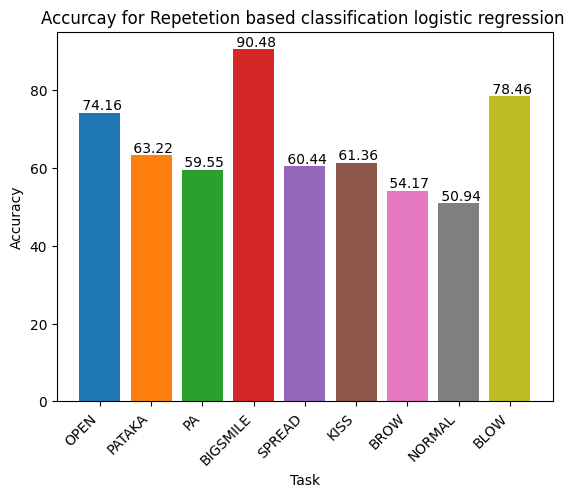

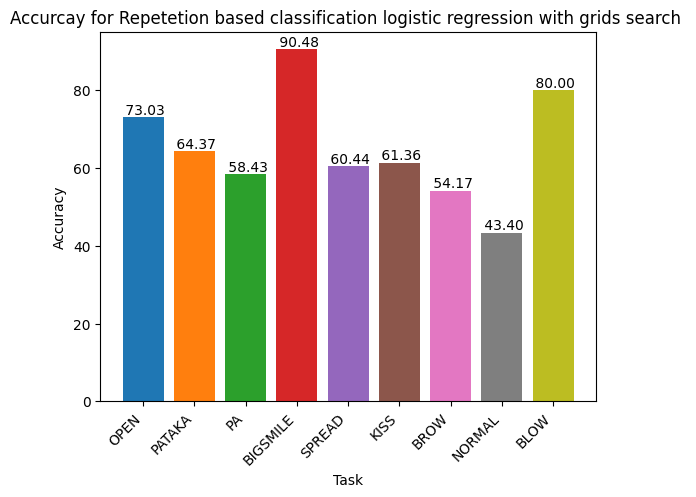

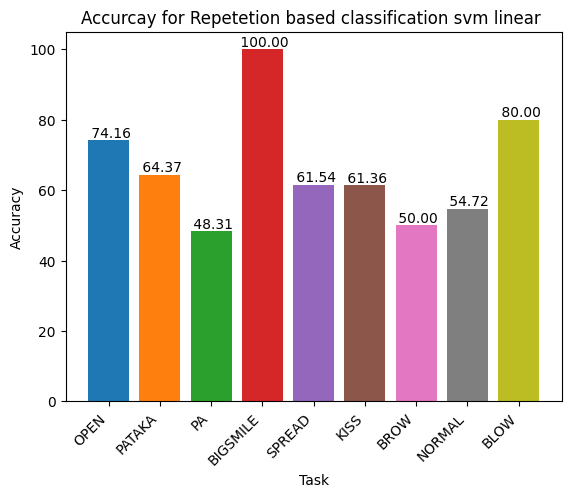

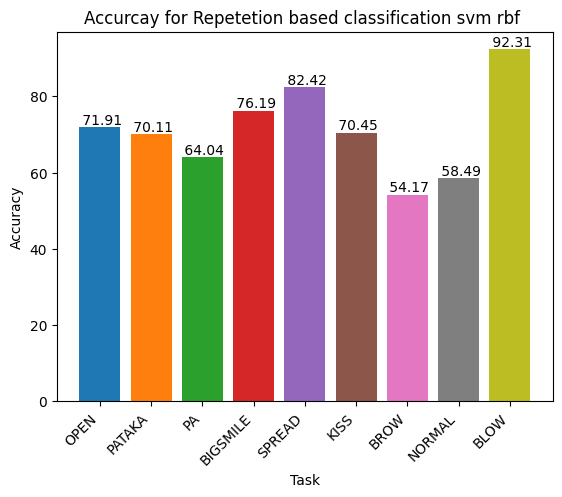

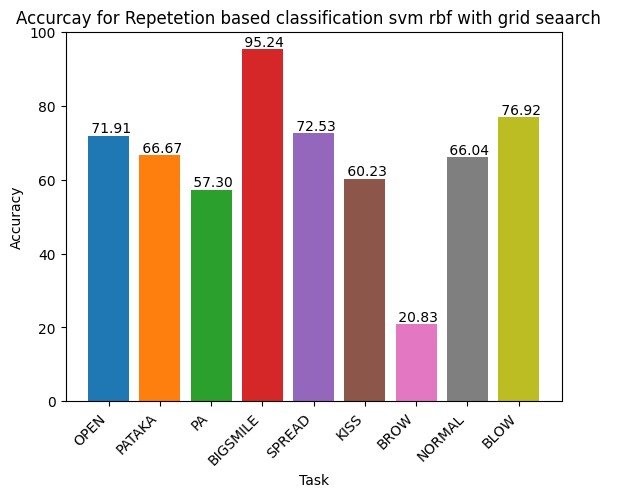

In [17]:
result={'logistic regression':results_logistic,'logistic regression with grids search':results_logistic_grid,'svm linear':results,'svm rbf':results_svm_rbf,'svm rbf with grid seaarch ':results_svm_rbf_grid}
for name,i in result.items():
  for task, metrics in i.items():
    accuracy = metrics['Accuracy']*100
    plt.bar(task,accuracy)
    plt.text(task, accuracy, f' {accuracy:.2f}', ha='center', va='bottom')
    plt.xlabel('Task',)
  plt.ylabel('Accuracy')
  plt.xticks(rotation=45, ha='right')
  plt.title(f'Accurcay for Repetetion based classification {name} ')
  plt.show()

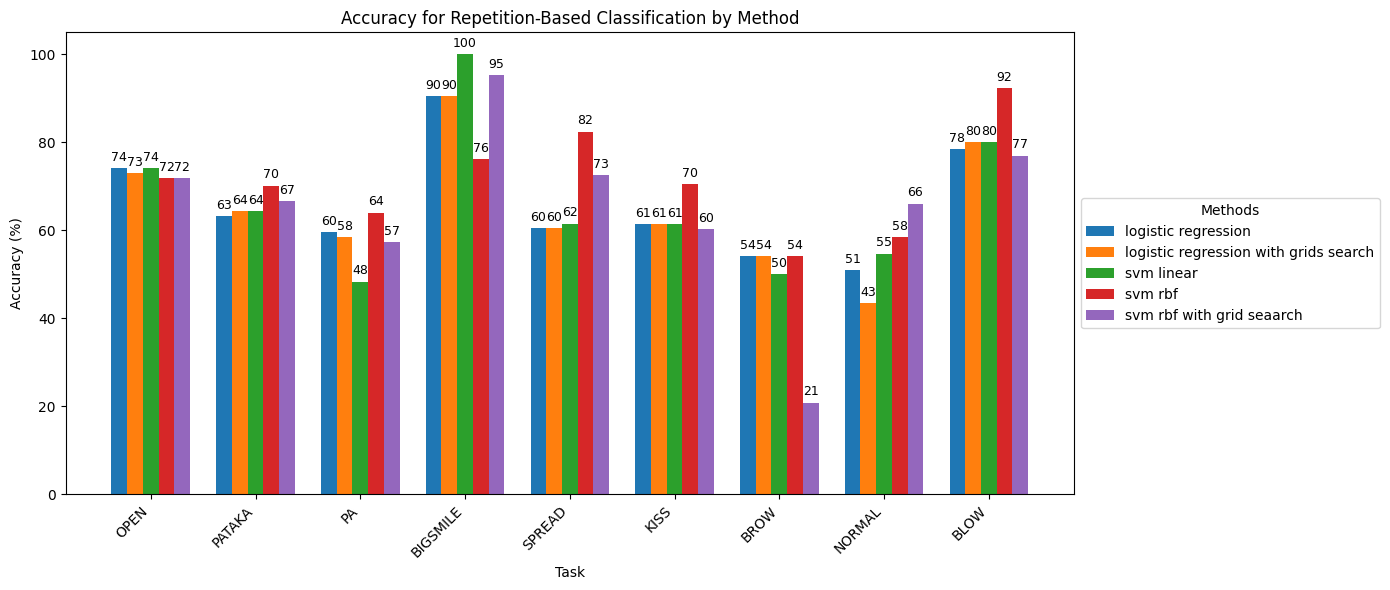

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for grouped bar chart
tasks = next(iter(result.values())).keys()  # Extract task names from one result set
methods = result.keys()  # Extract method names

# Create a dictionary to store accuracies
task_accuracies = {task: [] for task in tasks}

# Populate the dictionary with accuracies for each method
for method_name, method_results in result.items():
    for task in tasks:
        accuracy = method_results[task]['Accuracy'] * 100
        task_accuracies[task].append(accuracy)

# Create a grouped bar chart
x = np.arange(len(tasks)) * 2  # Add spacing between tasks
width = 0.3  # Bar width

plt.figure(figsize=(14, 6))  # Adjust figure size

# Plot bars for each method
for i, method_name in enumerate(methods):
    accuracies = [task_accuracies[task][i] for task in tasks]
    bars = plt.bar(x + i * width, accuracies, width, label=method_name)

    # Add accuracy values on top of bars
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f'{acc:.0f}', ha='center', va='bottom', fontsize=9)

# Add labels, title, and legend
plt.xlabel('Task')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Repetition-Based Classification by Method')
plt.xticks(x + width * (len(methods) - 1) / 2, tasks, rotation=45, ha='right')

# Move the legend to the right of the plot
plt.legend(title='Methods', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the chart
plt.show()
